<a href="https://colab.research.google.com/github/lifeisawavesorideit/99_LEARN_jvns_pandas-cookbook/blob/master/Chapter06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

In [3]:
csv_path = 'https://raw.githubusercontent.com/lifeisawavesorideit/99_LEARN_jvns_pandas-cookbook/master/data/weather_2012.csv'

In [5]:
weather_2012 = pd.read_csv(csv_path, sep=',', parse_dates=True, index_col='Date/Time')
weather_2012

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...
2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow


# 6.1 String operations

In [7]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')
is_snowing

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
                       ...  
2012-12-31 19:00:00     True
2012-12-31 20:00:00     True
2012-12-31 21:00:00     True
2012-12-31 22:00:00     True
2012-12-31 23:00:00     True
Name: Weather, Length: 8784, dtype: bool

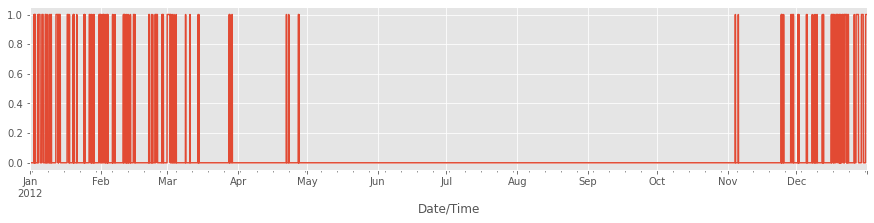

In [8]:
is_snowing = is_snowing.astype(float)
is_snowing.plot()

# 6.2 Use resampling to find snowiest month

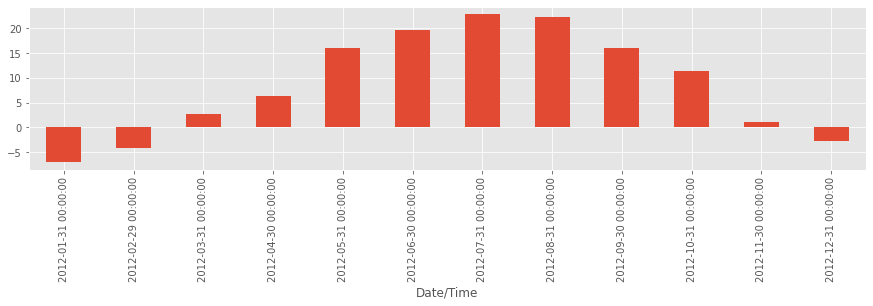

In [16]:
weather_2012['Temp (C)'].resample('M').apply(np.median).plot(kind='bar')


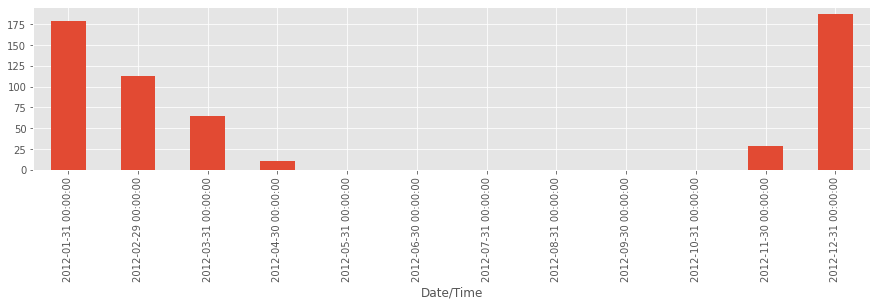

In [22]:
is_snowing.resample('M').apply(np.sum).plot(kind='bar')

# 6.3 Plotting temperature and snowiness stats together

In [24]:
temperature = weather_2012['Temp (C)'].resample('M').apply(np.median)
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('M').apply(np.mean)

temperature

Date/Time
2012-01-31    -7.05
2012-02-29    -4.10
2012-03-31     2.60
2012-04-30     6.30
2012-05-31    16.05
2012-06-30    19.60
2012-07-31    22.90
2012-08-31    22.20
2012-09-30    16.10
2012-10-31    11.30
2012-11-30     1.05
2012-12-31    -2.85
Freq: M, Name: Temp (C), dtype: float64

In [25]:
temperature.name = "Temperature"

In [26]:
temperature

Date/Time
2012-01-31    -7.05
2012-02-29    -4.10
2012-03-31     2.60
2012-04-30     6.30
2012-05-31    16.05
2012-06-30    19.60
2012-07-31    22.90
2012-08-31    22.20
2012-09-30    16.10
2012-10-31    11.30
2012-11-30     1.05
2012-12-31    -2.85
Freq: M, Name: Temperature, dtype: float64

In [27]:
stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperature,Weather
Date/Time,,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000


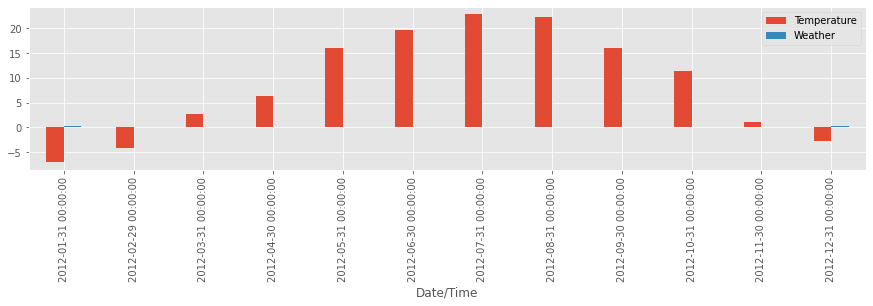

In [28]:
stats.plot(kind='bar')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cfe583f90>,
      dtype=object)

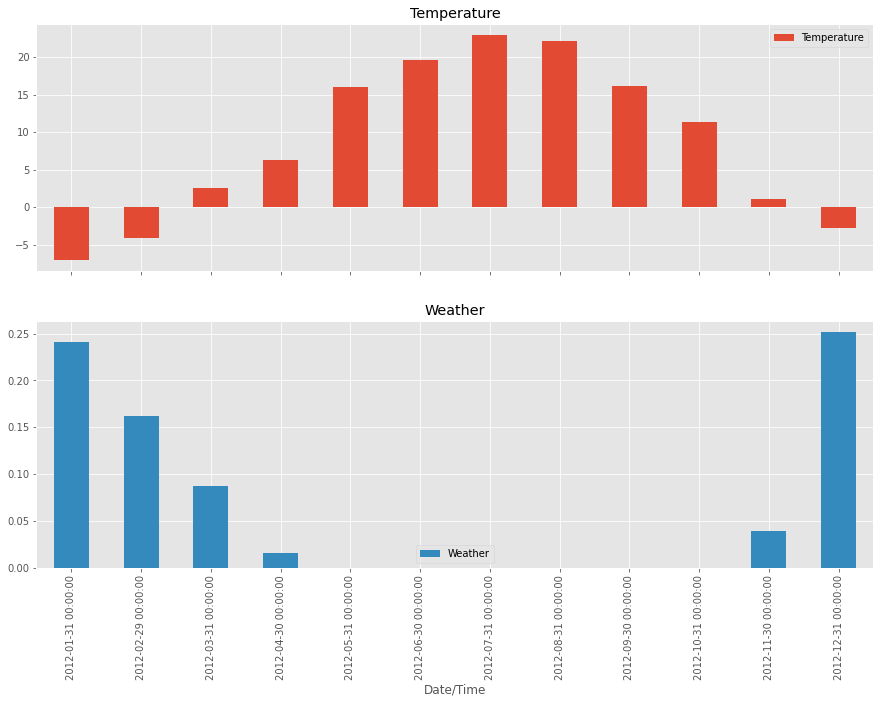

In [29]:
stats.plot(kind='bar', subplots=True, figsize=(15, 10))